In [2]:
import pandas as pd
import numpy as np


In [3]:
import matplotlib.pyplot as plt

In [4]:
from datetime import datetime
%matplotlib inline

In [5]:
# 2020년 8월부터 일요일 8개를 조회
#start:시작일, periods: 생성할 날짜의 개수, freq: 생성할 날짜의 주기
pd.date_range(start="2020-08",periods=8,freq="W")

DatetimeIndex(['2020-08-02', '2020-08-09', '2020-08-16', '2020-08-23',
               '2020-08-30', '2020-09-06', '2020-09-13', '2020-09-20'],
              dtype='datetime64[ns]', freq='W-SUN')

In [6]:
df= pd.DataFrame({
    "week":pd.date_range(start="2020-08",periods=8,freq="W"),
    "sales":[39,44,40,45,38,43,39,np.nan],
    "3MA":[0]*8
})

In [7]:
# 0~2주차 평균을 3주차에 shift해서 적용
df["3MA"]=df[["sales"]].rolling(3).mean().shift(1)
df


,week,sales,3MA
0,2020-08-02,39.0,NaN
1,2020-08-09,44.0,NaN
2,2020-08-16,40.0,NaN
3,2020-08-23,45.0,41.0
4,2020-08-30,38.0,43.0
5,2020-09-06,43.0,41.0
6,2020-09-13,39.0,42.0
7,2020-09-20,NaN,40.0


In [8]:
# Time series plot
import matplotlib.pyplot as plt

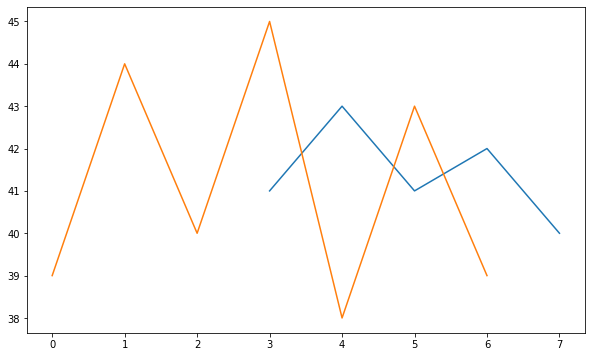

In [9]:
plt.figure(figsize=[10,6])
df["3MA"].plot()
df.sales.plot()

plt.show()

In [10]:
import FinanceDataReader as fdr
# 2010년~현재까지의 애플 주가를 데이터 프레임으로 불러오기

In [11]:
df_apple=fdr.DataReader('AAPL',start='2010')

In [12]:
# 가장 마지막의 10일치 주가 출력
df_apple.tail(10)

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2022-04-01,174.31,174.03,174.88,171.94,78750000.0,-0.0017
2022-04-04,178.44,174.57,178.49,174.44,76210000.0,0.0237
2022-04-05,175.06,177.50,178.30,174.41,70900000.0,-0.0189
2022-04-06,171.83,172.36,173.63,170.13,88670000.0,-0.0185
2022-04-07,172.14,171.16,173.36,169.85,74950000.0,0.0018
2022-04-08,170.09,171.78,171.78,169.20,76580000.0,-0.0119
2022-04-11,165.75,168.71,169.03,165.50,71550000.0,-0.0255
2022-04-12,167.66,168.02,169.87,166.64,78990000.0,0.0115
2022-04-13,170.40,167.39,171.04,166.77,70190000.0,0.0163


Text(0.5, 1.0, 'Close Price for Apple')

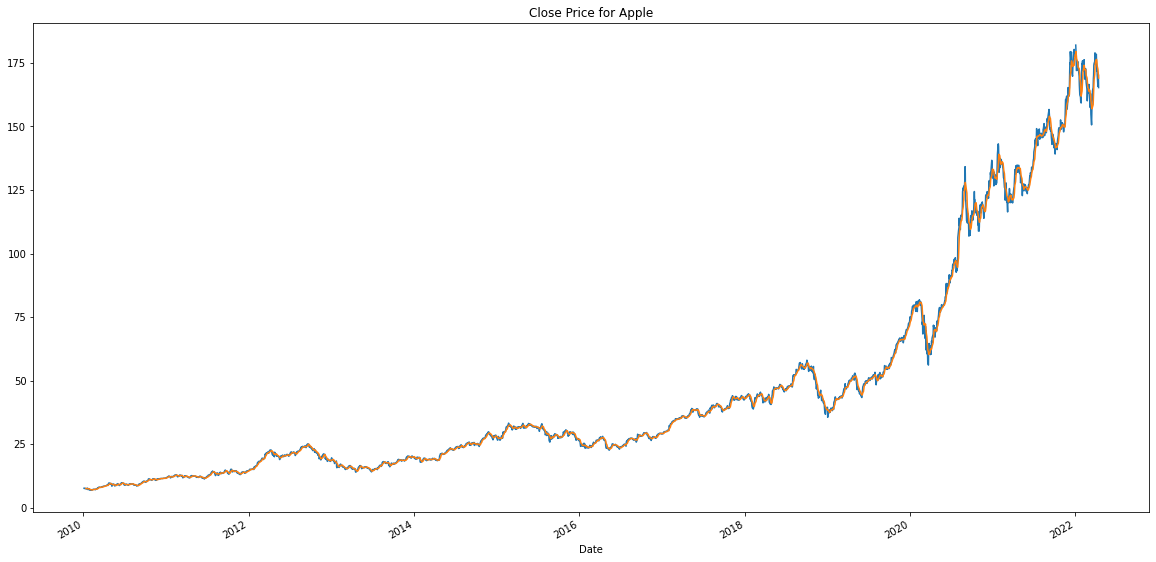

In [24]:
df_apple['Close'].plot(figsize=(20,10))
df_apple['Close_7Days_Mean']=df_apple['Close'].rolling(7).mean()
df_apple['Close_7Days_Mean'].plot(figsize=(20,10))
plt.title('Close Price for Apple')

<AxesSubplot:xlabel='Date'>

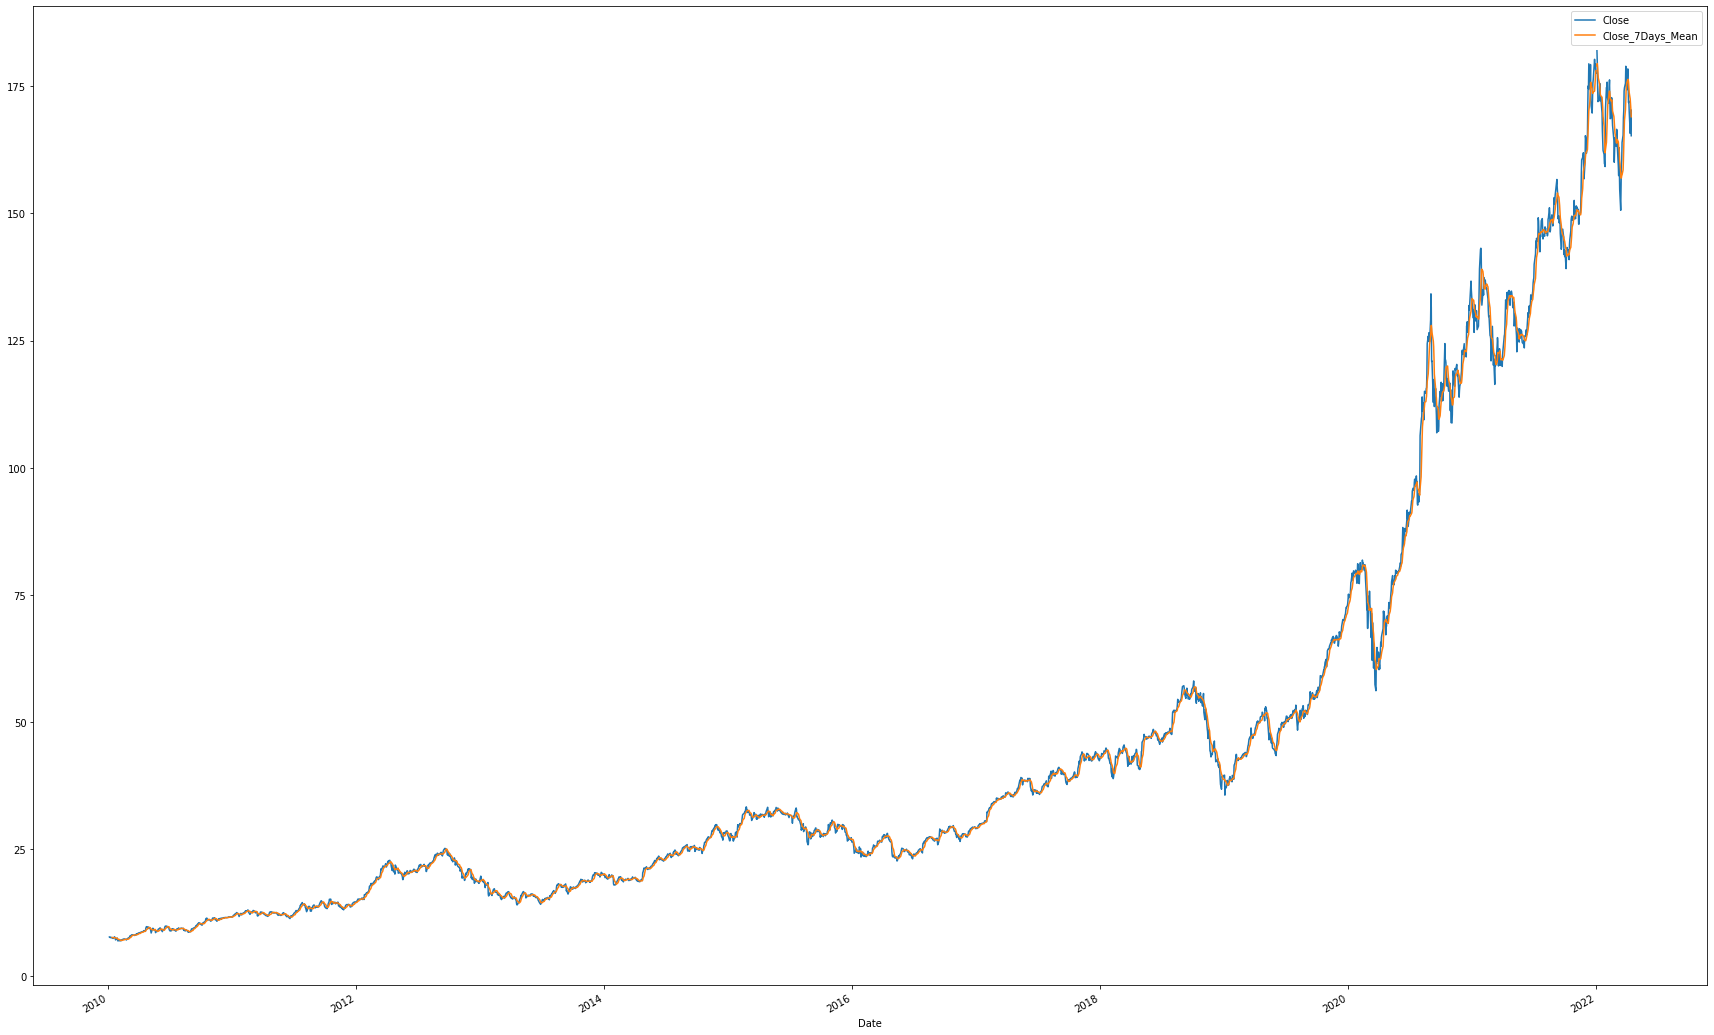

In [14]:
last_day= datetime(2022,1,2)
df_apple.loc[last_day,"Close"]=np.nan
df_apple['Close_7days_Mean']=df_apple['Close'].rolling(7).mean().shift(1)
df_apple[['Close','Close_7Days_Mean']].plot(figsize=(30,20))
#7일전 평균 값 그래프+ 종가그래프

Text(0.5, 1.0, 'Monthly Mean Close Price for Apple')

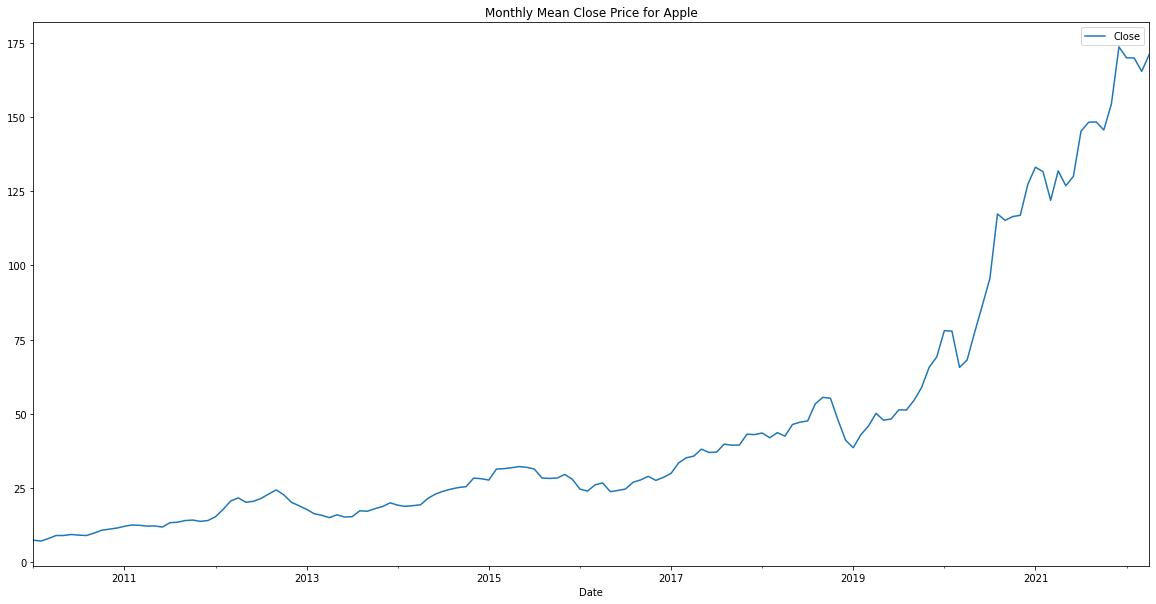

In [15]:
# pandas dataframe에는 resample 이라는 데이터프레임의 시계열 인덱스 기준으로
# 샘플리을 편하게 해주는 메소드가 있다. 아래와 같이 하면 월단위로 시계열 데이터를 다시 만들어준다.


# 월단위로 주식 가격의 평균을 샘플링
df_apple_monthly =df_apple.resample(rule='M').mean()
# 마지막 컬럼(Close_7Days_Mean)제외
df_apple_monthly=df_apple_monthly.iloc[:,:-1]
# 월별 주가(종가)를 시각화
df_apple_monthly[['Close']].plot(figsize=(20,10))
plt.title('Monthly Mean Close Price for Apple')

<AxesSubplot:xlabel='Date'>

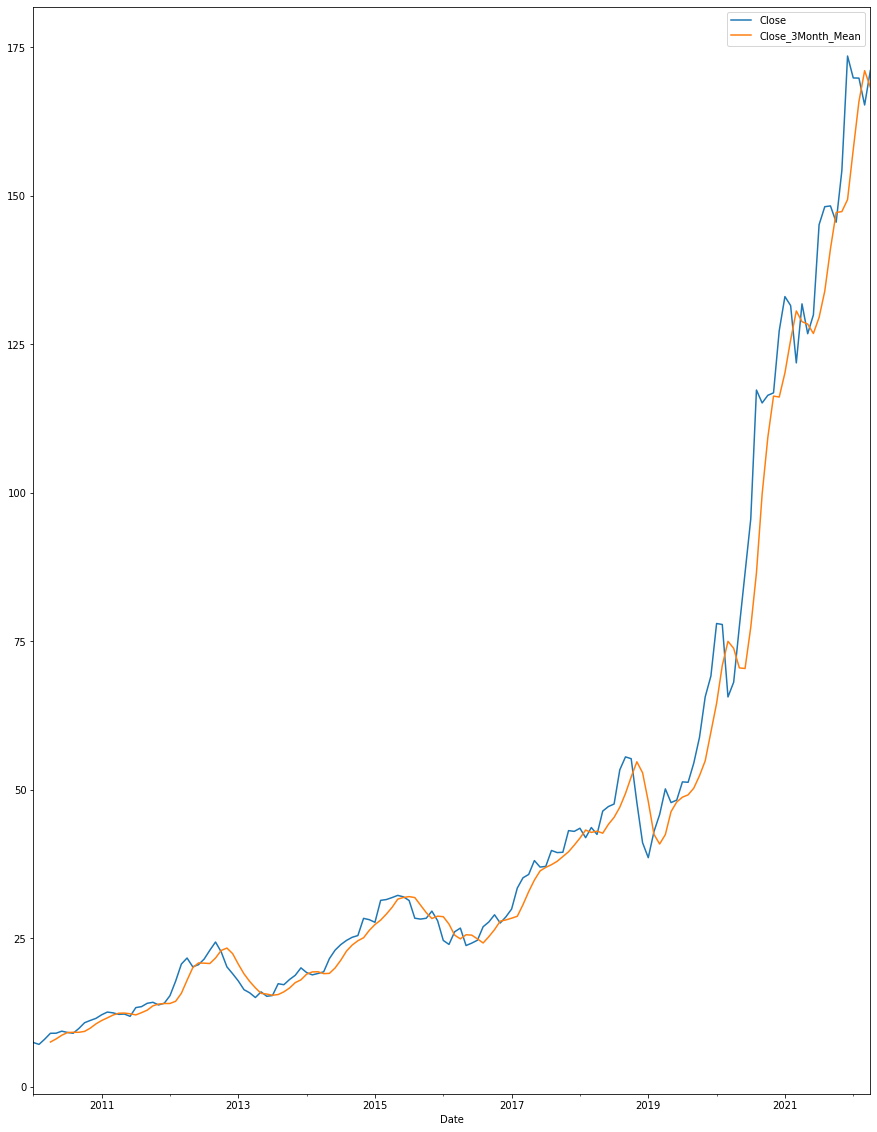

In [16]:
df_apple_monthly[['Close_3Month_Mean']]=df_apple_monthly[['Close']].rolling(3).mean().shift(1)
# shift 해주는 이유 - 3일 평균이면 3일째에 기록이 되어야되니까
df_apple_monthly[['Close','Close_3Month_Mean']].plot(figsize=(15,20))

In [17]:
df_apple_monthly[['Close']].rolling(3)

Rolling [window=3,center=False,axis=0,method=single]

In [18]:
df_apple_monthly[['Close']].rolling(3).mean().shift(1)

,Close
Date,
2010-01-31,NaN
2010-02-28,NaN
2010-03-31,NaN
2010-04-30,7.498368
2010-05-31,8.015769
...,...
2021-12-31,149.375238
2022-01-31,157.790750
2022-02-28,165.889981


In [19]:
df_apple_monthly[['Close']].rolling(3).mean()

,Close
Date,
2010-01-31,NaN
2010-02-28,NaN
2010-03-31,7.498368
2010-04-30,8.015769
2010-05-31,8.642269
...,...
2021-12-31,157.790750
2022-01-31,165.889981
2022-02-28,171.081409
